# Lab 2: Linear Regression

Linear Regression attempts to predict a continuous outcome feature (**Y**) from one or more explanatory features (**X**).  


$$Y = \beta_0 + \beta_1 X$$

$\beta_0$ is called the intercept term, and represents the expected mean value of Y when all explanatory features equal 0.  
$\beta_1$ is called a beta coefficient, and represents the expected change in the value of Y that results from a one unit change in X.  


Below is an example of a linear regression with only one explanatory feature. The red dots indicate the actual data, and the blue line represents the predicted **Y** values based on the provided **X** values.  $\beta_0$ appears to equals 0, and $\beta_1$ appears to equal 2.
<img src="../images/LinearRegression.png" alt="Drawing" style="width: 500px;height=500"/>

In this lab, we will attempt to construct a linear regression in order to answer a question that Kiva borrowers may have: 

**What impacts the loan amount requested? **

To ensure that our linear regressor is appropriate and interpretable, we will have to confirm the following assumptions are not violated:
  1. Linear relationship between x and y
  2. Normality
  3. Minimal multicollinearity (if multiple variables)
  4. No autocorrelation 
  5. Homoscedasticity 
  - Additional rule of thumb: at least 20 observations per independent variable in the analysis
  
If these assumptions are violated, then the predictive power of the linear regression is still valid but the information concerning the most important features is not. It is important to keep this in mind!


Here's a look ahead at what we'll be doing in this notebook: 

1. [Load Data and Packages](#loaddata)   
  1.1 Load python packages  
  1.2 Set jupyter notebook preferences  
  1.3 Load data
    
2. [Build Univariate Linear Regression](#regressor)

3. [Model Interpretation](#interpretation)

4. [Define and Check Assumptions](#assumptions)

5. [Build Multivariate Linear Regression](#multiregressor)

6. [Model Evaluation](#evaluation)


###### NOTE: **If you haven't already, please run through previous notebooks!**  You need the final ouput df_abridged.csv.

## 1. Import packages
<a id='loaddata'></a>

In [11]:
# 1.1 Load python packages
from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

# packages for checking assumptions
from scipy import stats as stats
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer



In [12]:
# 1.2 Set jupyter notebook preferences
# the command below means that the output of multiple commands in a cell will be output at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

fig = plt.figure(figsize=(20,8))
%matplotlib inline
# the command below tells jupyter to display up to 100 columns, this keeps everything visible
pd.set_option('display.max_columns', 200)
pd.set_option('expand_frame_repr', True)

In [6]:
# 1.3 Load Data
data_path = 'data/'
df = pd.read_csv(data_path+'df_abridged.csv', low_memory=False)

## 2. Build Univariate Linear Regression
<a id="regressor"></a>

### Train - Test split

Prior to building our model, we first need to split our dataset into a training set and a test set.  We will use our training set to train our regressor, and we will use our test set for model validation.
To achieve this, we will use call sklearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), and set the input parameter `test_size` to .2 so that 20% of the data will be assigned to the test set and 80% of the data will be assigned to the training set.

**We set the test set aside and only look at this at the end to evaluate the models performance on unseen data.**

We fix the random state so that each time we run the train_test_split code, we get the same distribution of data. This is important as keeping the data split constant allows us to compare results from different sessions. 

In [13]:
# Define our dependant variable
y = df['loan_amount']
# Define  our independant variables
X = df[['borrower_count']]
# Add an intercept term to the independant variables. This is needed in order to include the constant term from
# linear regression equation.
X['cnst'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)

/home/rosina/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Univariate Linear Regression
In order to build our linear regressor, we will use [statsmodels](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) implementation.  The are other implementations out there; however, we will use statmodels because it creates a nice summary table for model evaluation. Let's print out the summary table to demonstrate how easy it is to train the model and see the results.

For an in-depth review on all the statistics and numbers given in the summary below, check out this [awesome page!](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)

In [14]:
model0 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                 1.615e+04
Date:                Thu, 07 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:04:28   Log-Likelihood:            -7.8450e+05
No. Observations:              106379   AIC:                         1.569e+06
Df Residuals:                  106377   BIC:                         1.569e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
borrower_count    49.7735      0.392    127.

## 3. Model interpretation
<a id='interpretation'></a>

This is the typical regression output. It's a lot to digest! Remember that our simple model can be represented as a linear equation, like this: 

    loan_amount = intercept + coef*borrower_count

Therefore, these results can be translated as follows: 

    loan_amount = 384 + 50*borrower_count
    
Let's state the results. Regardless of the number of borrowers, the predicted loan amount is 384 dollars. However, with the every additional borrower, the loan amount increases by 50 dollars. This is consistent with our earlier explanatory analysis. How do we know however, whether this is a significant result?

We have a sufficient amount of confidence in this conclusion because the **p-value** is reported to be 0.000. In technical terms, the p-value is **the probability of getting results as extreme as the ones observed given no correlation. **

In statistics, we want our results to fall within the 95% confidence interval, or the p-value to be <= 0.05. This means, "[i]f repeated samples were taken and the 95% confidence interval was computed for each sample, 95% of the intervals would contain the population mean. A 95% confidence interval has a 0.95 probability of containing the population mean. 95% of the population distribution is contained in the confidence interval." [Read more here.](http://www.investopedia.com/terms/s/standard-error.asp) The p-value is an indicator of where we fall in the confidence interval. In English, small p-value (<= 0.05) indicates strong evidence that the coefficient is different than 0. 

This is a relatively simplified explanation of p-values. Don't worry if it's not immediately intuitive - [not even professional statisticians can easily explain this concept.](http://fivethirtyeight.com/features/not-even-scientists-can-easily-explain-p-values/) To get a deeper understanding, we recommend grabbing the nearest textbook on statistics to review! 

Note also that the Adjusted R Squared is extremely low. To recap lessons from Module 2, the Adjusted R Squared is an explanation of how much of the outcome feature can be explained by the model's explanatory features. This low Adj R Squared suggests that the predictive value of borrower_count alone is pretty low - it cannot be used as the single feature to predict loan_amount. 

This result is in line with our understanding of the world - there must be other factors influencing loan_amount!

**Before we start looking for other explanatory features, it is important to note that interpretation of the results above is only valid if the assumptions of linear regression are not violated. Lets go through these assumptions now...**

## 4. Checking Assumptions
<a id='assumptions'></a>

In order for linear regression to be an appropriate model, the following assumptions must be confirmed:
  1. Linear relationship between x and y. 
  2. Normality of residuals
  3. Minimal multicollinearity 
  4. No autocorrelation
  5. Homoscedasticity 


If these assumptions are not met, the results of the linear regression model would not be useful in describing the relationship between the variables. This means that condidence intervals, beta coefficients and insights yielded from the results maybe biased or misleading.



### Linearity
First, as the name implies, linear regression requires the underlying relationship between the independent (x) and dependent (y) variables to be linear. This means that a line drawn through the points can capture the relationship, with some degree of error. 

We must also be aware of outliers, which can throw off a linear relationship. 

The most straightforward check of linearity is to make scatter plots of the variables chosen.

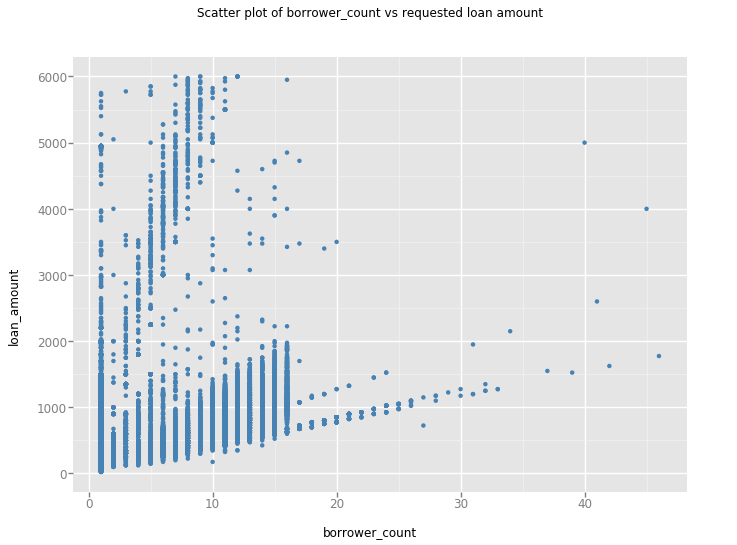

<ggplot: (-9223363263965894645)>

In [15]:
ggplot(df, aes('borrower_count', 'loan_amount')) + geom_point(color='steelblue') + \
    ggtitle('Scatter plot of borrower_count vs requested loan amount')

From the scatter plot, it's apparent that there is a  general linear relationship betweeen the borrower count and the loan amount requested, however there seems to be more than one trend. We will note this and investigate it further on in this notebook!

We can use a scatter matrix to look at the scatter plots for numerous features at the same time. Below, we use the scatter matrix plotting function that comes with the pandas library.

The diagonals of the scatter matrix represent the 'kernal density approximation' for the given features. This can be thought of as a continuous histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa98ea240f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa98e936208>]], dtype=object)

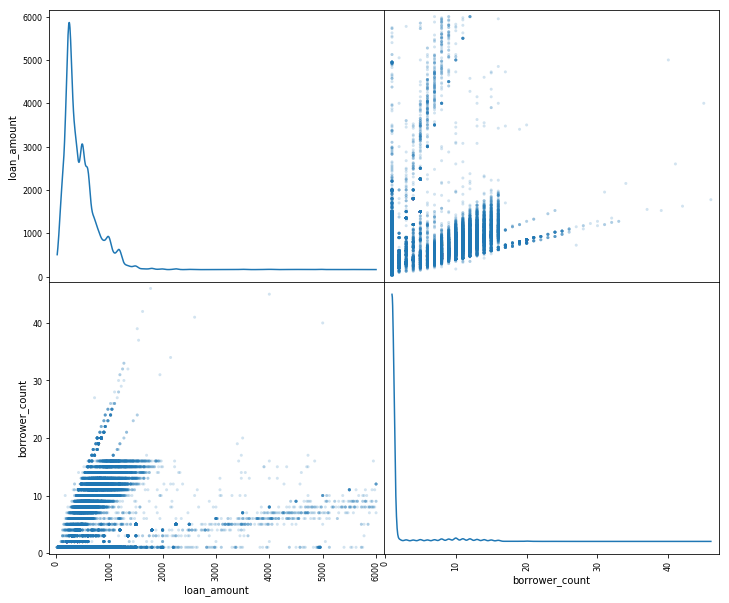

In [16]:
# Extract the features to include
features_to_correlate = df[['loan_amount', 'borrower_count']]
# Plot the scatter matrix
scatter_matrix(features_to_correlate, alpha=0.2,figsize=(12, 10), diagonal='kde')
plt.show()

### Normality

Normality means the distribution of values falls into a normal distribution. 

The results summary printed above gives us an indication of whether or not our data is normally distributed. If the **Prob(JB)** number is less than 0.05, this means that we can reject the Null hypothesis that the data distribution is normal. If this is the case, we need to look into our model more closely see where this is coming from and how/if we can rectify the issue.

We can visualize the normality of the data by making histograms or Q-Q (quantile-quantile) plots.

First we will look at a histogram for the dependant variable, loan_amount. From this, we can see that the dependant variable is skewed to the left.

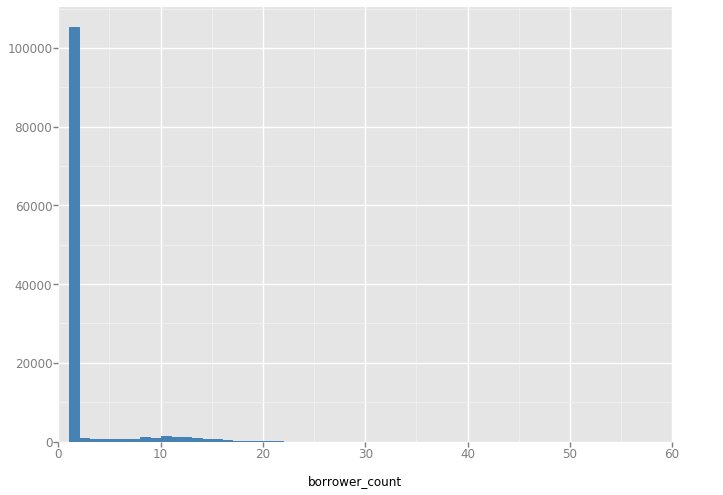

<ggplot: (8772881762045)>

In [21]:
# Denisty plot for the request loan amount
ggplot(df, aes(x='borrower_count')) + geom_histogram(binwidth=1, color='steelblue', fill='steelblue') + xlim(0,60)

Furthermore, we can create a quantile-quantile plot to see how the distribution of data compares that expected from a normal distribution. In these plots, the quantiles from the measured data are compared to that of a normal distribution and if the measured data is normal, we expect to see a straight line.

The plot below clearly shows that the depedant varaible is not normal and therefore we need to investigate the skew further to see if the data required transformation. 

((array([-4.38257562, -4.18538075, -4.07818105, ...,  4.07818105,
          4.18538075,  4.38257562]),
  array([ -1.0935009 ,  -1.0935009 ,  -1.0935009 , ...,  13.22618165,
          13.22618165,  13.22618165])),
 (0.79757670889628873, 2.1460987809335477e-16, 0.79754672073632249))

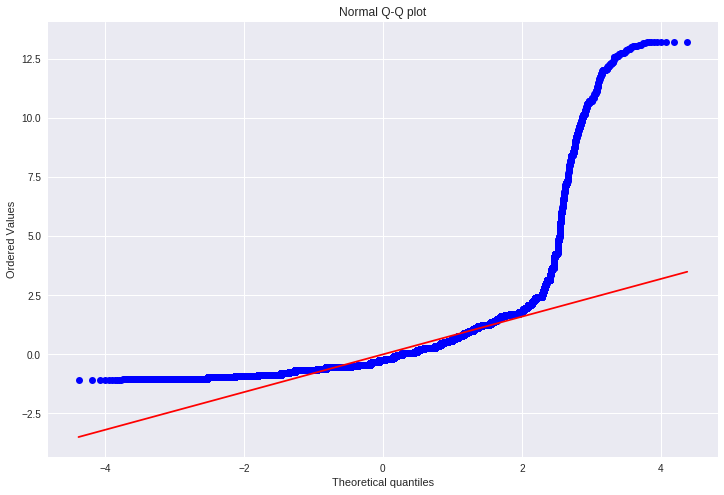

In [38]:
# Convert depedant variable to a numpy and standardise the data
y = np.asarray(df['loan_amount'])
standardised_y = (y-np.mean(y))/np.std(y)
# create a normal Q-Q plot using the stats module probplot
plt.figure(figsize=(12,8))
stats.probplot(standardised_y, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

If a variable is not normal, it may be adjusted by a [non-linear transformation](https://stats.stackexchange.com/questions/298/in-linear-regression-when-is-it-appropriate-to-use-the-log-of-an-independent-va).

We already know our data is skewed by outliers, however before we begin modeling let's quantify the degree to which it is skewed.

[Scipy's stats package](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.skew.html) allows you to conduct a skew test. A normally distributed dataset would return about 0. A skewness value of greater than 0 means there are more loans in the left tail of the distribution. Typically, a skew score of +-5 is deemed acceptable.


[Multivariate normality](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) is a generalization of one-dimensional, or univariate, normality, to more dimensions. For a regression using multiple independent (x) variables, this means checking that all of the linear combinations of variables used are normal. 


In [39]:
print(stats.skew(df.loan_amount, axis=None))

5.35285653378


This confirms our suspicion that the data is skewed to the left, i.e. the mean is smaller than the median. However, the degree to which it is skewed is not troubling. +-5 is fairly reasonable. 

We can continue with the linear regression model for predicting the loan_amount however, we should be aware that our beta-coefficients may be not be reliable do to the skewedness of the data. 


**If you face a dataset with more severely skewed data, we describe a way to address this in the appendix below.**

### Multicollinearity

To recap Module 2's lesson, multicollinearity means that two or more explanatory features are highly correlated.

This makes it difficult for the model to try to differentiate between each feature's influence on the explanatory feature.

Again, the summary table from the linear regression can help us again. There is a statistic in the bottom right hand corner known as the **condition number**. This indicates the severity and impact of multicolinearity in the regression and as a rule fo thumb, values over 30 are an issue. 

One way to check this is by examining the correlation matrix and making sure none of the variables correlate to 1. Numpy's Corrcoef function returns a matrix of Pearson correlation coefficients. 

Read more about Numpy's Corrcoef [here](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.corrcoef.html).




It would take a long time for us to test each and every relationship between two sets of variables, so let's create a correlation matrix that lets us visualize every correlation in a dataset using Pandas.

In [28]:
df_corr_tbl = df[['loan_amount','partner_loans_posted', 'posted_month', 'partner_delinquency_rate']]
df_corr_tbl.corr()

,loan_amount,partner_loans_posted,posted_month,partner_delinquency_rate
loan_amount,1.000000,-0.201286,-0.020265,0.012336
partner_loans_posted,-0.201286,1.000000,0.004283,0.315862
posted_month,-0.020265,0.004283,1.000000,0.008193
partner_delinquency_rate,0.012336,0.315862,0.008193,1.000000


We can also use a correlation heatmap to visualise the correlation between many features at once. 

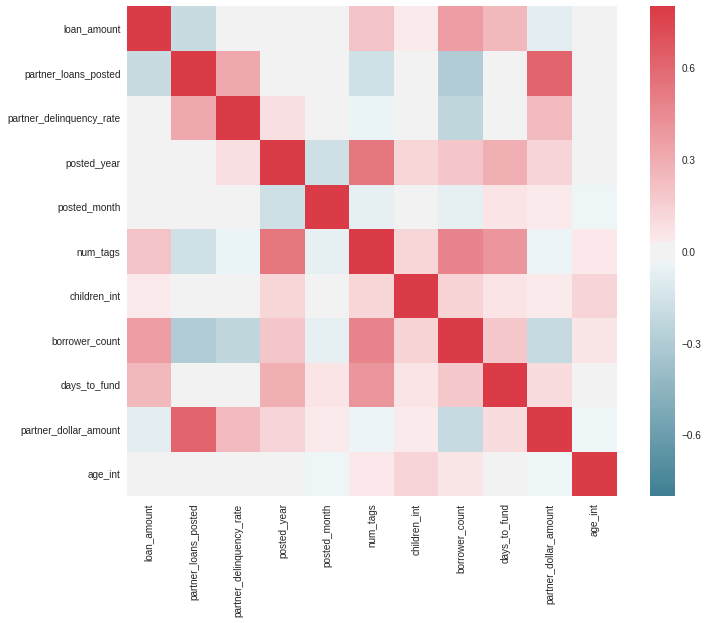

In [29]:
df_corr = df[['loan_amount', 'partner_loans_posted','partner_delinquency_rate', 'posted_year','posted_month', 'num_tags','children_int','borrower_count','days_to_fund','partner_dollar_amount','age_int']]
# Compute the correlation matrix
corrmat  = df_corr.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap using seaborn
sns.heatmap(corrmat, cmap=cmap, vmax=.8, square=True)


This plot tell us a few interesting things:

**Correlation with loan_amount**
The following variable have the highest correlation coefficients with loan_amount
- borrower_count
- partner_loans_posted
- num tags
- days_to_fund

** Multicolinearity**
Out of the variables above, there are potetnial multicolinearity issues with:
- Borrower_count is correlated with num_tags. 
- Partner_loans_posted is inversely correlated with partner_loans_posted

However, in all cases the multicollinearity is weak (correlation coefficient less than 0.6 and therefore it is not a major cause of concern. 

### No autocorrelation

A variable has autocorrelation when values in the series correlate with others in the same series, separated by a given interval.

In terms of the residuals, this means checking that residuals are independent.

A check for this is the **Durbin-Watson test**. The durbin-watson statistic ranges from 0 to 4 with values around 2 suggesting no autocorrelation. Values < 2 suggest positive correlation and values > 2 suggest negative correlation.

In the summary table above, the Durbin-Watson test has a value of 1.998 so we can be happy that there is no autocorrelation.



### Homoscedasticity

Homoscedasticity is a statistical term that means that the spread of the residuals are equal across the regression line. This assumption means that the variance around the regression line is the same for all values of the predictor variable (X). 

Again, the summary table from the linear regression allows us to evaluate whether the model has homoscedasticity. If **Prob(Omnibus)** number is less than 0.05 we can reject the Null Hypothesis that the residuals are distributed uniformly and normally around zero.

In the case above, the Prob(Omnibus) is 0.00 which clearly indicates that the model does not have homoscedasticity.

This can be seen the plot below, the distribution of the residual are not consistent across the range of data. Therefore, we need to work on our regression model more!

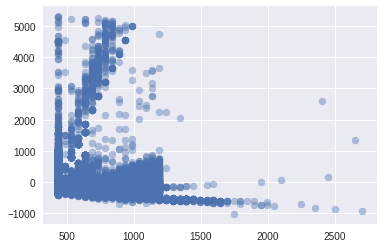

In [233]:
y_pred = model0.predict(X_train)
plt.scatter(y_pred, (y_train-y_pred) , alpha = .4)

### Summary

To recap the finding from the linear regression assumptions check above:
  1. Linear relationship between x and y. 
      - For the independant variable 'borrower_count', there is multi-trend linear relationship
  2. Normality
      - The dependant variable data is not normally distributed and is left-hand skewed. 
  3. Minimal multicollinearity 
      - There is minimal/weak multicollinearity between feature which is not much of a concern.
  4. No autocorrelation
      - Durbin-Watson test indicates no autocorrelation
  5. Homoscedasticity 
      - With the single independant feature of borrower_count, the model is not homoscedacity. We will build upon our model and try again.


## 5. Build Multivariate Regression
<a id='multiregressor'></a>

The first regression we built was a univariate regression meaning we had one independant variable, which in this case was 'borrower_count'. Our EDA demonstrated that in general, the more borrowers the higher the loan amount. 

However, if we look at a scatter plot of the loan_amount vs borrower_count below, we can see that there are at least two distinct trends and the majority of multi borrower loans are with One Acre Fund. To look at these trends more closely, we can look at the same plot for all the unique top_partners

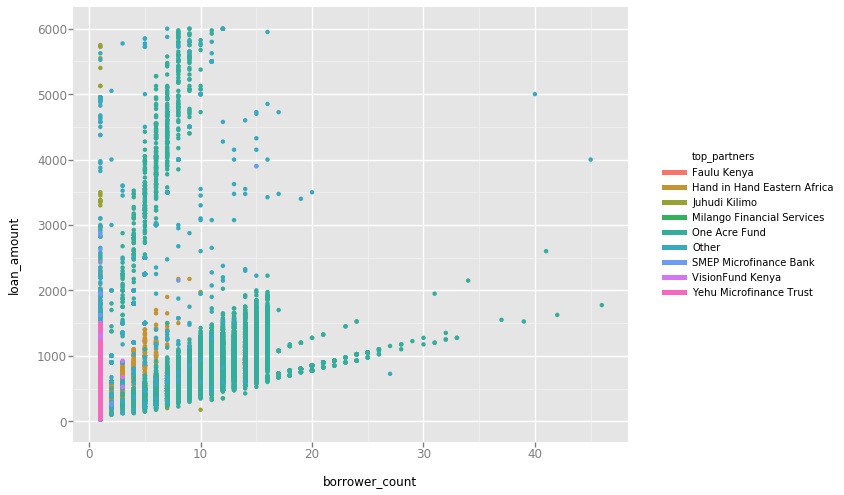

<ggplot: (8743475656617)>

In [9]:
ggplot(df, aes(x='borrower_count', y='loan_amount',color='top_partners')) + geom_point()

In [22]:
df['top_partners'].unique()

array(['Other', 'Juhudi Kilimo', 'VisionFund Kenya',
       'Hand in Hand Eastern Africa', 'Yehu Microfinance Trust',
       'SMEP Microfinance Bank', 'One Acre Fund',
       'Milango Financial Services', 'Faulu Kenya'], dtype=object)

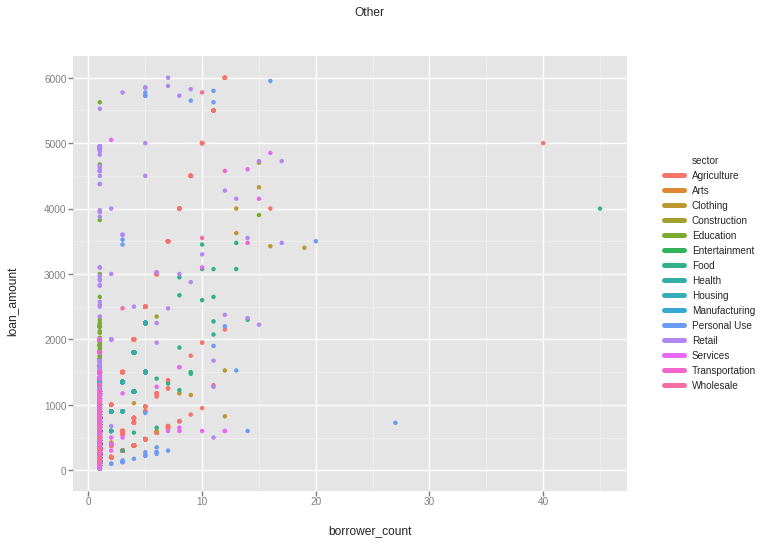

<ggplot: (8730639174945)>

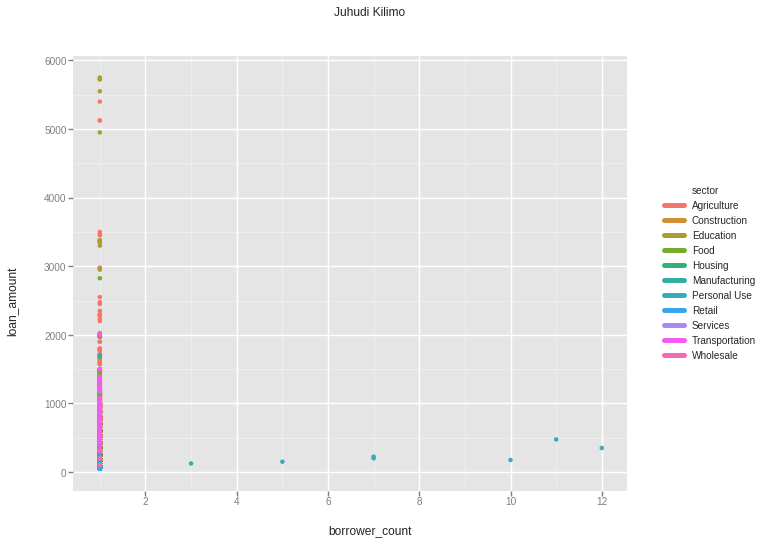

<ggplot: (8730639174917)>

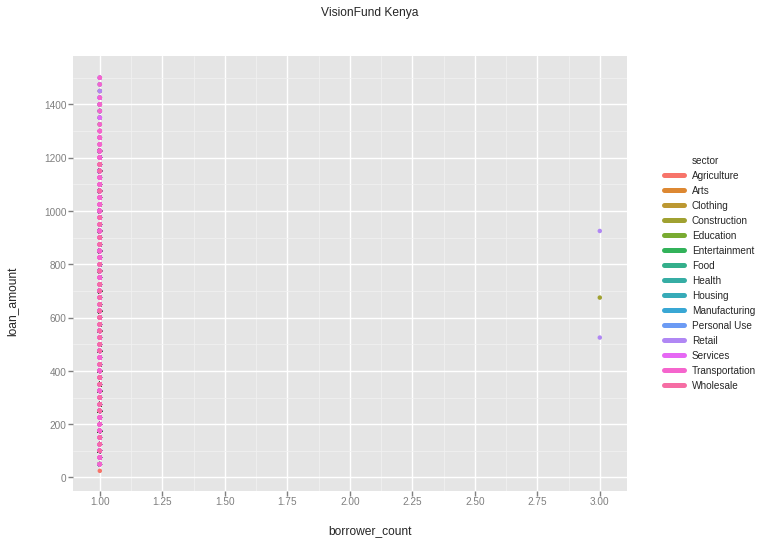

<ggplot: (8730639716901)>

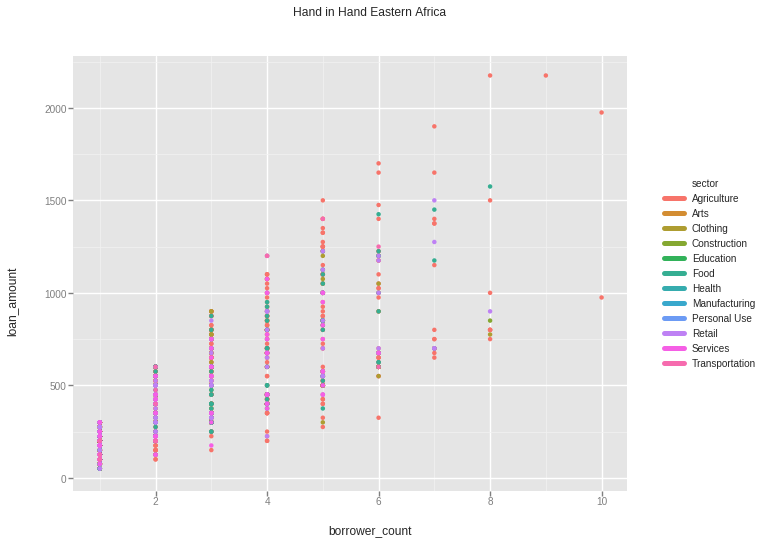

<ggplot: (8730639716897)>

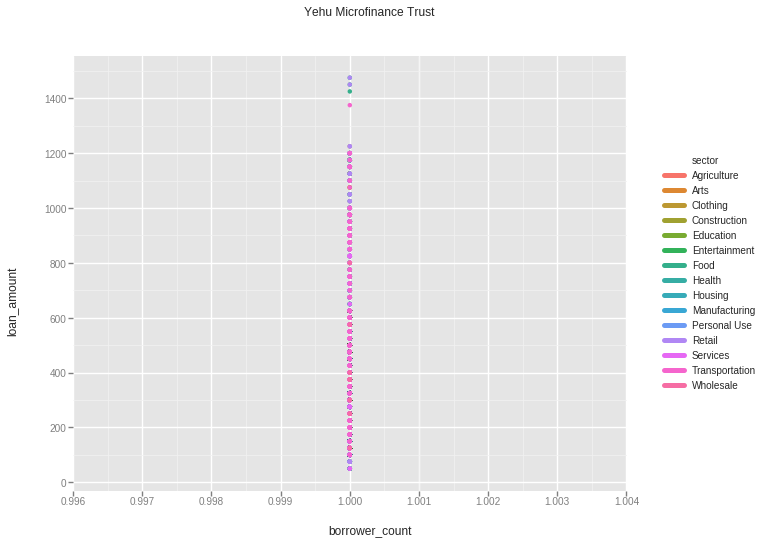

<ggplot: (8730641081917)>

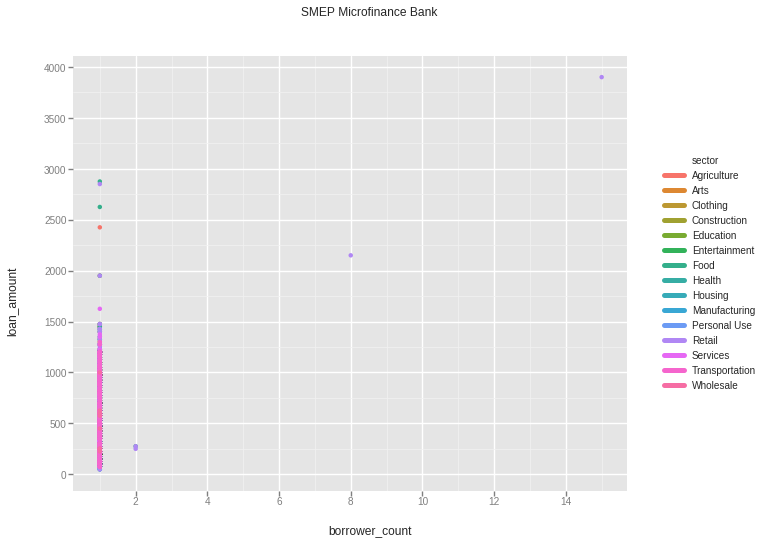

<ggplot: (8730639377137)>

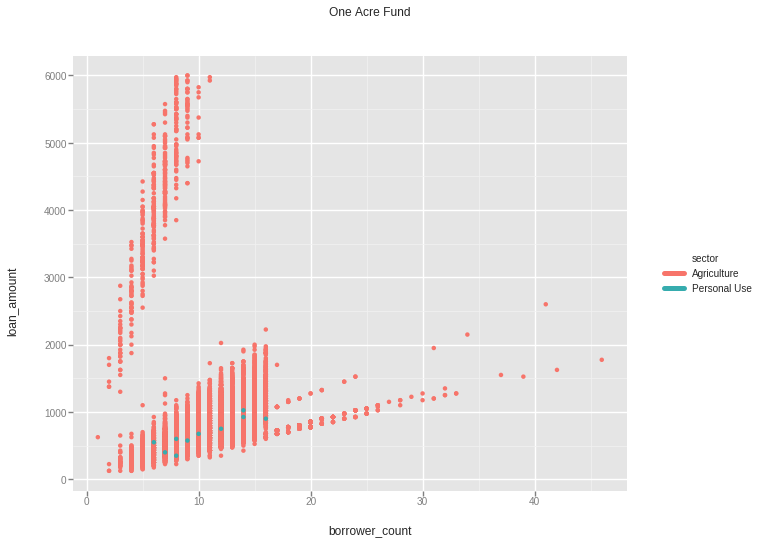

<ggplot: (8730639346193)>

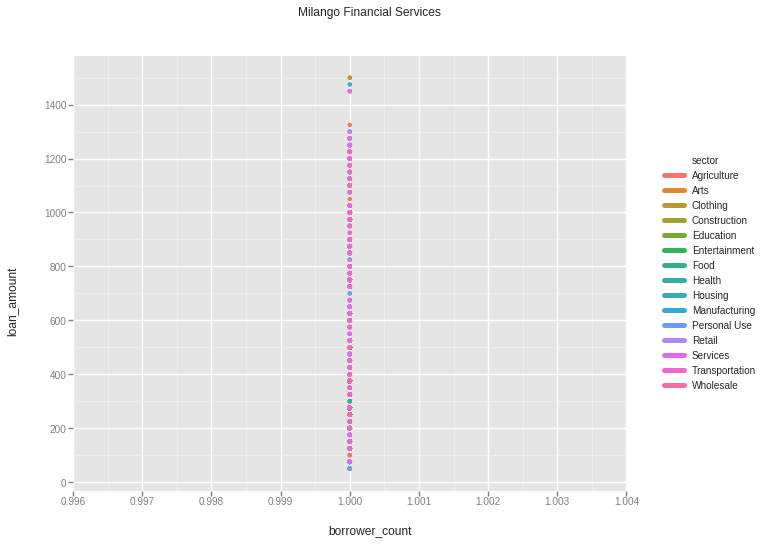

<ggplot: (8730639239693)>

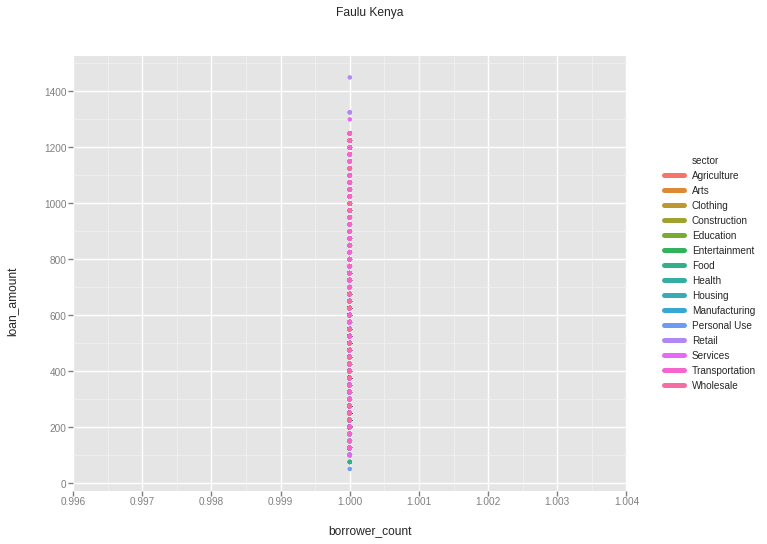

<ggplot: (8730639269701)>

In [31]:
for partner in df['top_partners'].unique():
    ggplot(df[df['top_partners']==partner], aes(x='borrower_count', y='loan_amount',color='sector')) + geom_point() + ggtitle(partner)

A stronng linear relationship between borrower_count and loan_amount only exists for the following top_partners:
- Hand in Hand Eastern Africa
- One Acre Fund

For One Acre Fund, the trend is very interesting. There are two very dictinct linear trends. Further investigation shows that this is temporal effect. One Acre Fund loans between November 2013 and April 2014 were generally higher than on average:

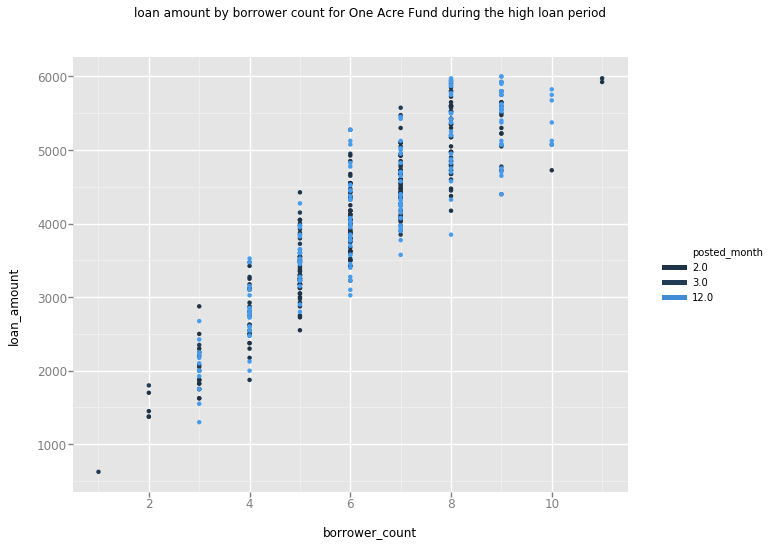

<ggplot: (8772875634110)>

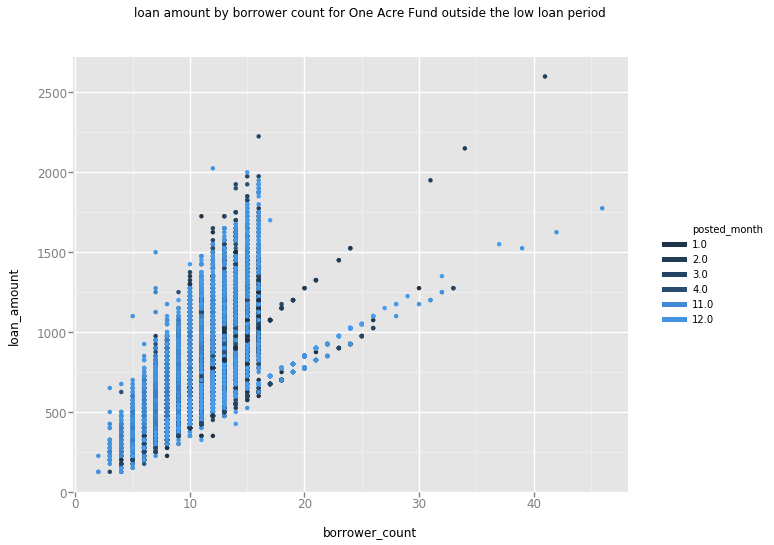

<ggplot: (8772875560207)>

In [23]:
# Create condition statements to filter for One Acre Fund loan during the periods of interest
condition_high = (df['top_partners']=='One Acre Fund')&(((df.posted_year == 2013.0) & (df.posted_month > 11))|((df.posted_year ==2014.0)&(df.posted_month < 5)))
condition_low = (df['top_partners']=='One Acre Fund')&(~((df.posted_year == 2013.0) & (df.posted_month > 10)))&(~((df.posted_year ==2014.0)&(df.posted_month < 5)))
# Filter dataframe for loans of interest
df_oaf_high = df[condition_high]
df_oaf_low = df[condition_low]
# Scatter plots of loan_amount vs borrower count
ggplot(df_oaf_high, aes(x='borrower_count', y='loan_amount',color='posted_month')) +geom_point() + ggtitle('loan amount by borrower count for One Acre Fund during the high loan period')
ggplot(df_oaf_low, aes(x='borrower_count', y='loan_amount',color='posted_month')) +geom_point() + ggtitle('loan amount by borrower count for One Acre Fund outside the low loan period')


To improve our model, we can include 'Interaction Terms'. These are variables which describe the interaction between two or more independant varaibles. 

In this example, we expect the increase in loan amount with number of borrowers to be different for different Partners. Therefore, we create new variables which capture this interation by creating a new borrower count feature for the different partners.

As there are only two partners which show a strong relationship between borrower_count and loan_amount, we will define 4 new variables:
- bc_partner_HIHEA = borrower count (bc) for the partner Hand in Hand Eastern Africa
- bc_partner_OAD_high = borrower count (bc) for the partner One Acre Fund during the high loan period
- bc_partner_OAD_low = borrower count (bc) for the partner One Acre Fund outside the high loan period
- bc_partner_other = borrower count (bc) for all other partners

[Here](http://www.dummies.com/programming/big-data/data-science/data-science-how-to-create-interactions-between-variables-with-python/) you can find more information on Interaction Terms in regression problems.

In [24]:
# Iteraction term for all other partners
df['bc_partner_others'] = np.where(~df['top_partners'].isin(['Hand in Hand Eastern Africa','One Acre Fund']),df['borrower_count'],0)
# Iteraction term for Hand in Hand Eastern Africa
df['bc_partner_HIHEA'] = np.where(df['top_partners'] == 'Hand in Hand Eastern Africa',df['borrower_count'],0.5)

In [25]:
# Iteraction term for One Acre Fund in high loan period
df['bc_partner_OAF_high'] = np.where(condition_high,df['borrower_count'],0.5)
# Iteraction term for One Acre Fund outside of high loan period
df['bc_partner_OAF_low'] = np.where(condition_low, df['borrower_count'],0)

Now we have split out borrower_count into 4 seperate variables, lets see how the linear regression performs now.

In [26]:
# Define the dependant variable
y = df['loan_amount']
# Define the independant variables
X = df[['bc_partner_others','bc_partner_HIHEA','bc_partner_OAF_high','bc_partner_OAF_low']]
# Add an intercept term to the independant variables
X['cnst'] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/home/rosina/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
model1 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                 2.257e+04
Date:                Thu, 07 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:17:37   Log-Likelihood:            -6.7382e+05
No. Observations:               94559   AIC:                         1.348e+06
Df Residuals:                   94554   BIC:                         1.348e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
bc_partner_others     259.6518    

Look at that! Just by creating interaction terms between the borrower_count and top_partners features, we have managed to increase our adj R2 from 0.132 up to 0.488 - Not bad! 

Also looking at the P-values tells us that all of the cooefficients are significant. The next question to ask is then, how do we interpret the coefficients of these interaction terms? Lets take the coefficient for bc_partners_HIHEA for example. We interpret this is the following way; if the top partner is Hand in Hand Eastern Africa, then for every additional borrower, we expect the loan amount to increase by $104. The same concept can be applied to the other coefficients. 


Now can we add any more features to this model? Let's think back to the EDA and feature engineering to find some other features that might be useful. Here are a few we are going to include:
- Gender
- tag_#Repeated Borrower
- sectors
- partner_delinquency_rate
- partner_loans_posted

In [28]:
# Create dummy variable for Gender
df['female'] = np.where(df['gender'] =='Female', 1, 0)
# Create dummy variable for partner_status
for status in ['active','closed']:
    df['partner_'+status] = np.where(df.partner_status ==status, 1, 0)

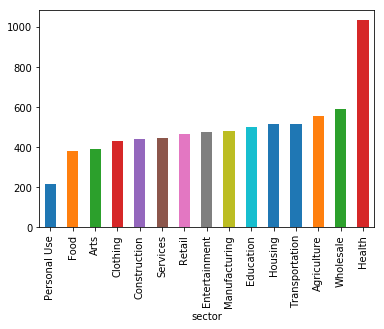

In [29]:
df.groupby('sector')['loan_amount'].mean().sort_values().plot(kind='bar')

Health, Wholesale, Agriculture, Arts, Food and Personal Use seem to have loan amounts different to the other sectors. Lets try including these as features...

In [30]:
for sect in ['Personal Use','Food','Arts','Agriculture','Wholesale','Health']:
    df['sector_'+sect] = np.where(df.sector ==sect, 2, 0)

In [31]:
y = df['loan_amount']
X = df[['bc_partner_others','bc_partner_HIHEA','bc_partner_OAF_high','bc_partner_OAF_low','female',
        'tag_#Repeat Borrower','sector_Personal Use','sector_Health','sector_Wholesale','sector_Agriculture',
       'kids','partner_delinquency_rate','married']]
# Add an intercept term to the independant variables
X['cnst'] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/home/rosina/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
model2 = sm.OLS(endog = y_train,exog = X_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     7943.
Date:                Thu, 07 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:17:55   Log-Likelihood:            -6.7061e+05
No. Observations:               94559   AIC:                         1.341e+06
Df Residuals:                   94545   BIC:                         1.341e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
bc_partner_others       

Adding these features have improved the model slightly, the adj R2 has increased from 0.488 to 0.522 and again, all the p-values are less than 0.005 so we can consider than as significant. Lets interpret the results then...
- female coef = -53. In general women ask for loans that are 64 dollars less than the equivalent asked by a man. 
- tag_#Repeat Borrower coef = 103. In general, repeat borrowers ask for 124 dollars more than none repeat borrowers. 
- sectors_Personal Use coef = -243. In general, if a loan is for personal use, it is 231 dollars less than others. The same concept applies to the sectors health, wholesale and agriculture and their respective coefficients.
- kids coef = -22. If kids is mentioned in the description, they ask for 12 dollars less.
- etc etc


** Now lets check some of the linear regression assumption that we covered above to check that we can confidently interpret the models coefficients as above **

To do this quickly, we will use the statistics given in the summary table. For more information on these, check out this [awesome page!](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)

1) Normality: The Prob(JB) number is less than 0.05 which means we reject the Null Hypothesis that the data is normally distributed. **ASSUMPTION NOT MET**

2) Multiconlinearity: The Condition number is greater than 30 which means we have an issue with multicolinearity in the model. **ASSUMPTION NOT MET**

3) Autocorrelation: Durbin-Watson number is approximately 2 so no autocorrelation. **ASSUMPTION MET**

4) Homoscedasticity: Prob(Omnibus) number is less than 0.05 which means we reject the Null Hypothesis that the residuals are normally distributed. **ASSUMPTION NOT MET**

We clearly have an issue here! Although the predictive power of the model is still valid, meaning we can still predict using the model with an R^2 of 0.522 - we CANNOT interpret the coefficients in the way we would hope. 

The underlying issue here is that data is not normally distributed and that the is not always a linear relationship between the dependant and independant variables. Therefore, we may have to look towards non-parametric models.

## 6. Model Evaluation
<a id='evaluation'></a>

Discarding the fact that our lienar regression assumptions are not met for a moment, lets evaluate how the models predictive power. 

For this purpose, we are going to switch over to sklearn's Linear Regression package. This allows us to use other sklearn metrics and functions to evaluate the model performance. An important function we are going to use here is sklearn's [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

This model allows us to perform cross validation on our training dataset and output the score of our choice. Lets walk through this now....



In [20]:
# Initialize the model. We set fit_intercept as false as we already have the constant included in our data. 
linear = LinearRegression(fit_intercept=False)
# Use the cross_val_sore function to calculate the r2 cross validation
r2_cross_val_score = cross_val_score(linear, X_train, y_train, cv = 5).mean()
# Results!
print 'cross validation R2: {}'.format(r2_cross_val_score)

cross validation R2: 0.521203588123


The cross validation R2 score is very similar to the training R2 which gives us confidence that the model will perform well on the unseen test data!

Another useful metric to evaluate a models performance is the mean squared error which tells us how much error our model produced on average. We can also implement this in sklearn cross_val_score! By default, the cross_val_score function will use the default scorer for the model, which in the case for linear regression is the R2. 

However, we can 'create' an MSE scorer as follows and use that instead...

In [21]:
# make MSE scorer
mse_scorer = make_scorer(mean_squared_error)
# use the cross_val_score function to calculate to the cross validated MSE
mse_cross_val_score = cross_val_score(linear, X_train, y_train, scoring=mse_scorer, cv =5).mean()
# Results!
print 'cross validation MSE: {}'.format(mse_cross_val_score)
print 'cross validation RMSE: {}'.format(np.sqrt(mse_cross_val_score))

cross validation MSE: 84802.9848283
cross validation RMSE: 291.209520497


This suggest that the average error in our model is 291 dollars - not bad!

** Now lets see how it performs on our test data!**

In [22]:
#Train the Model
model2 = linear.fit(X_train, y_train)
#Get R2 for test data
print 'R2 on test data: {}'.format(model2.score(X_test, y_test))

R2 on test data: 0.540392961444


Great! This is comparable to the cross validation R2 so we know we are not overfitting! 

In [23]:
# Get predictions for the test data
y_pred_test = model2.predict(X_test)
print 'root mean squared error on test data: {}'.format(np.sqrt(mean_squared_error(y_test,y_pred_test)))

root mean squared error on test data: 273.0597659


Again, this is comparable to the cross validated score so we are confident to model performs well on unseen data!

Finally, lets visualize how our model performs on the test data...

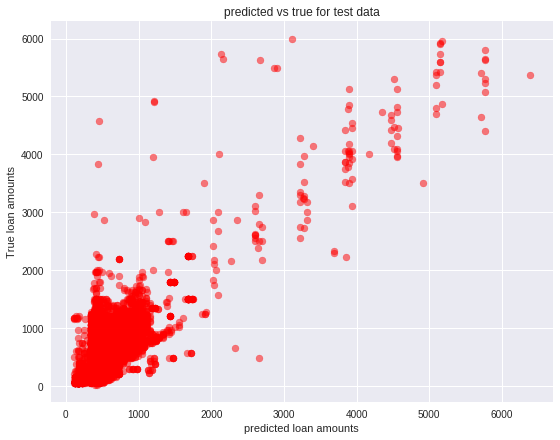

In [39]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted loan amounts')
plt.ylabel('True loan amounts')
plt.show()

In [40]:
df.to_csv('../data/df_end_of_linear.csv')

## Next Steps

Next monday, we will go over your results and well as show you what we did for the multivariate regression. Next, we move on to a new algorithm (decision trees). Very exciting!

## Homework

Choose three other features you think might influence loan amount. Interpret the results by writing a statement like the one below that we wrote to understand the relationship with gender:

"Regardless of gender the predicted loan amount is 424 dollars. However, if the lender is a man the predicted loan amount increases by 110 dollars." 


### Univariate Regression 1

### Univariate Regression 2

### Univariate Regression 3

## Advanced Homework (Optional)

Multivariate regression is where there are multiple explanatory variables. Below is a code template for you to start playing with a multivariate model. Interpret your results.

In [ ]:
model1 = sm.ols(formula="[replace with the name of your outcome feature] ~[replace with the name of your explantory variable 1]  + [replace with the name of your explantory variable 1] +[replace with the name of your explantory variable 1] +", data=train_set)
model1_results = model1.fit()
print(model1_results.summary())

## Multivariate Regression

In [ ]:
model1 = sm.ols(formula="log_loan_amount ~ borrower_count + sector + kids + gender + widowed + pictured + video + posted_year +\
                days_to_expire + repayment_term + partner_profitability + eco_friendly + animals + elderly + technology", data=train_set)
model1_results = model1.fit()
print(model1_results.summary())

This **multi-feature** (or multivariate) model is more aligned with our understanding of the world. Most coefficients have very low p-values - a good sign! 

Our Adjusted R Squared is higher than it was in the single-feature model. Let's get into how we evaluate the model in terms of predictiveness. 

## Appendix A.
## Additional context on how to deal with skewed data:
<a id="skewed"> </a>


One potential solution is to **log transform** your data. For a quick review of logarithms, look [here](https://www.mathsisfun.com/algebra/logarithms.html). 

Note that when we log transform data, we change our interpretation of the final regression output. Previously we had a simple linear equation... 

    y = mx + b

This could be interpreted as, with every unit increase in x, we get a m increase in outcome feature y. Now we have a log equation: 

    log(y) = mx + b
    
This is less intuitive, as we have to solve for y. When we solve for y through exponentiation, we get the following equation: 

    y = 10^(mx + b)
    y = 10^(mx) * 10^(b)

The default base for log is 10. The takeaway here is that the impact x would have on y is much larger than linear - it is **exponentiated**. We will return to this interpretation in the discussion of the linear regression model. Let's try log transforming our loan_amount variable. 

(array([ 91216.,  23982.,   2048.,    265.,    108.,    127.,    122.,
           126.,    105.,    100.]),
 array([   25. ,   622.5,  1220. ,  1817.5,  2415. ,  3012.5,  3610. ,
         4207.5,  4805. ,  5402.5,  6000. ]),
 <a list of 10 Patch objects>)

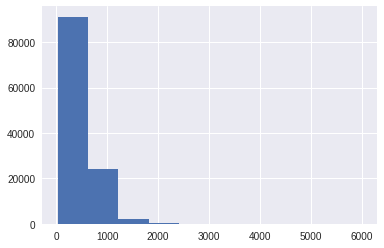

In [103]:
# Histogram of loan_amount 
plt.hist(df['loan_amount'])

(array([  1.00000000e+01,   6.73000000e+02,   7.69700000e+03,
          1.18480000e+04,   4.06270000e+04,   3.36210000e+04,
          1.90380000e+04,   3.86000000e+03,   3.18000000e+02,
          5.07000000e+02]),
 array([ 3.21887582,  3.76693972,  4.31500361,  4.8630675 ,  5.41113139,
         5.95919529,  6.50725918,  7.05532307,  7.60338696,  8.15145086,
         8.69951475]),
 <a list of 10 Patch objects>)

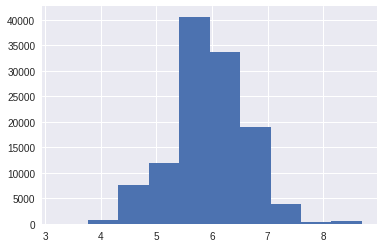

In [106]:
# Take the log of loan amount and plot histogram
log_loan_amount = np.log(df['loan_amount'])
plt.hist(log_loan_amount)

## Appendix B
### Choosing the right features

So we've increased our R2 by adding additional promising features from our Exploratory Data Analysis (EDA). However, how should we go about choosing the best combination of features for our model? In general there are two approachs:
- stepwise regression = Incrementally adding promising features and checking the R2 and p-valules at each step to check it is worth adding. This is the approach we used above. 
- Ridge or Lasso regression = These are methods whcih algorithmically reduce the beta coefficients for less important feature and can be used to find the most useful combination of features. More in depth information can be found here: [Regularization Regression](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

Lets test Lasso regression and see what we get! 

For context, Ridge and Lasso regression have a hyper-parameters called 'alpha' which determines how 'strong' the regularization affect is. 

A useful way to use Ridge or Lasso regression is to run the regression over a range of alphas and see which features maintain a large beta coefficient for the longest. It is these features which have the most predictive power!

In [218]:
# import the Ridge linear regression model from Sci-kit learn
from sklearn.linear_model import Lasso
alphas = np.arange(0.001, 0.502, 0.002)
lasso_coefs = []
X_train_lasso= X_train[['borrower_count',
                 'partner_loans_at_risk_rate','posted_year','kids','num_tags','tag_#Woman Owned Biz',
                 'tag_#Repeat Borrower','parent','married','age_int','children_int','more_one_partner_country']]
i = 0
for a in alphas:
    lassoreg = Lasso(alpha=a, copy_X=True, normalize=True)
    lassoreg.fit(X_train_lasso, y_train)
    lasso_coefs.append(lassoreg.coef_)
    i+=1

KeyError: "['borrower_count' 'partner_loans_at_risk_rate' 'posted_year' 'num_tags'\n 'tag_#Woman Owned Biz' 'parent' 'age_int' 'children_int'\n 'more_one_partner_country'] not in index"

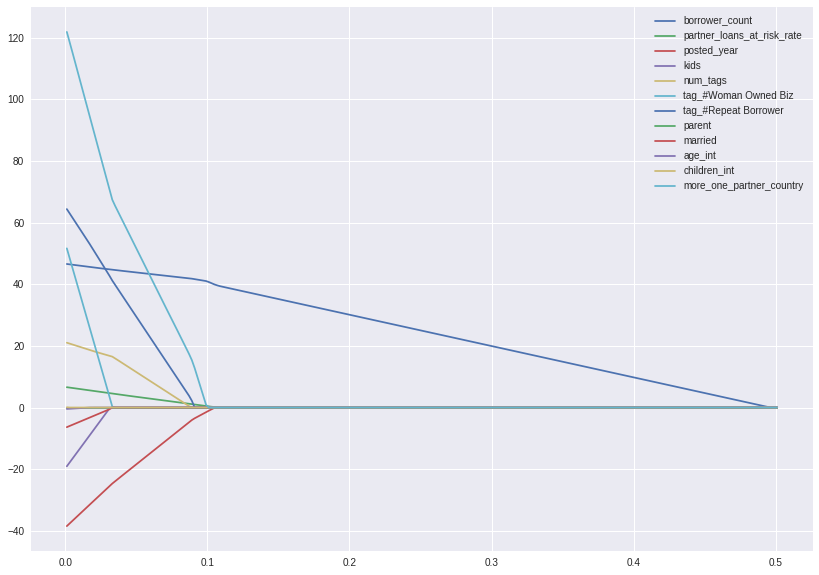

In [175]:
lasso_coefs = np.asarray(lasso_coefs).T

plt.figure(figsize=(14,10))
for coefs, feature in zip(lasso_coefs, X_train_lasso.columns):
    plt.plot(alphas, coefs, label = feature)
plt.legend(loc='best')
plt.show()

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.0030000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.0050000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.0070000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.0090000000000000011, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.010999999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.013000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.014999999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.017000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.019000000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.021000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.023, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.025000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.027000000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.029000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.031, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.033000000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.035000000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.037000000000000005, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.039, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.041000000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.043000000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.044999999999999998, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.047, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.049000000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.051000000000000004, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.053000000000000005, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.055, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.057000000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.059000000000000004, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.060999999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.063, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.065000000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.067000000000000004, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.069000000000000006, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.071000000000000008, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.073000000000000009, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.074999999999999997, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.076999999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.079000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.081000000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.083000000000000004, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.085000000000000006, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.087000000000000008, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.088999999999999996, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.090999999999999998, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.092999999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.095000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.097000000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.099000000000000005, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.10100000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.10300000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.10500000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.107, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.109, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.111, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.113, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.115, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.11700000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.11900000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.121, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.123, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.125, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.127, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.129, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.13100000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.13300000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.13500000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.13700000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.13900000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.14100000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.14300000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.14500000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.14699999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.14899999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.151, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.153, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.155, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.157, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.159, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.161, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.16300000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.16500000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.16700000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.16900000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.17100000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.17300000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.17500000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.17699999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.17899999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.18099999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.183, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.185, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.187, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.189, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.191, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.193, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.19500000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.19700000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.19900000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.20100000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.20300000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.20500000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.20700000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.20900000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.21099999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.21299999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.215, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.217, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.219, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.221, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.223, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.22500000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.22700000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.22900000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.23100000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.23300000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.23500000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.23700000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.23900000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.24099999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.24299999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.245, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.247, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.249, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.251, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.253, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.255, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.25700000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.25900000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.26100000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.26300000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.26500000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.26700000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.26900000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.27100000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.27300000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.27500000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.27700000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.27900000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.28100000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.28300000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.28500000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.28700000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.28900000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.29099999999999998, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.29299999999999998, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.29499999999999998, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.29699999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.29899999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.30099999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.30299999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.30499999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.307, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.309, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.311, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.313, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.315, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.317, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.31900000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.32100000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.32300000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.32500000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.32700000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.32900000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.33100000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.33300000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.33500000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.33700000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.33900000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.34100000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.34300000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.34500000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.34700000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.34900000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.35100000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.35299999999999998, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.35499999999999998, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.35699999999999998, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.35899999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.36099999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.36299999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.36499999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.36699999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.36899999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.371, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.373, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.375, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.377, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.379, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.38100000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.38300000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.38500000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.38700000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.38900000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.39100000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.39300000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.39500000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.39700000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.39900000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.40100000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.40300000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.40500000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.40700000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.40900000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.41100000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.41300000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.41500000000000004, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.41700000000000004, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.41899999999999998, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.42099999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.42299999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.42499999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.42699999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.42899999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.43099999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.433, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.435, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.437, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.439, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.441, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.443, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.44500000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.44700000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.44900000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.45100000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.45300000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.45500000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.45700000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.45900000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.46100000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.46300000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.46500000000000002, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.46700000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.46900000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.47100000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.47300000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.47500000000000003, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.47700000000000004, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.47900000000000004, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.48099999999999998, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.48299999999999998, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.48499999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.48699999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.48899999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.49099999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.49299999999999999, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.495, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.497, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.499, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.501, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

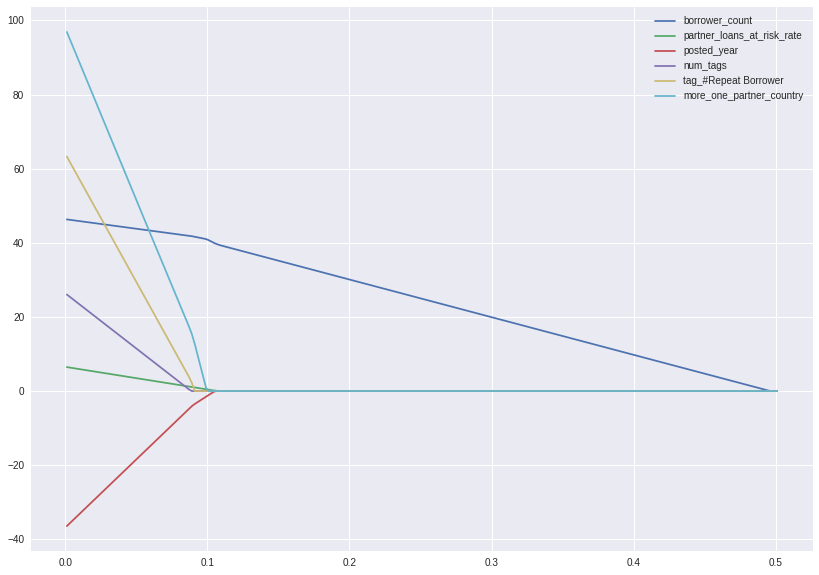

In [178]:
# The most important features according to Lasso Regression
lasso_coefs = []
X_train_lasso= X_train[['borrower_count',
                 'partner_loans_at_risk_rate','posted_year','num_tags',
                 'tag_#Repeat Borrower','more_one_partner_country']]
i = 0
for a in alphas:
    lassoreg = Lasso(alpha=a, copy_X=True, normalize=True)
    lassoreg.fit(X_train_lasso, y_train)
    lasso_coefs.append(lassoreg.coef_)
    i+=1
    
lasso_coefs = np.asarray(lasso_coefs).T
plt.figure(figsize=(14,10))
for coefs, feature in zip(lasso_coefs, X_train_lasso.columns):
    plt.plot(alphas, coefs, label = feature)
plt.legend(loc='best')
plt.show()

In [181]:
X_train_3= X_train[['cnst','borrower_count','partner_loans_at_risk_rate','posted_year','num_tags',
                 'tag_#Repeat Borrower','more_one_partner_country']]

model3 = sm.OLS(endog = y_train,exog = X_train_3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     3304.
Date:                Mon, 16 Oct 2017   Prob (F-statistic):               0.00
Time:                        16:41:02   Log-Likelihood:            -6.9652e+05
No. Observations:               94559   AIC:                         1.393e+06
Df Residuals:                   94552   BIC:                         1.393e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
cnst                